# Import

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read dataset
file_path = "Study Case DA.xlsx"

In [111]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

# Dataframe & Sheets

In [112]:
strength = pd.read_excel(file_path, sheet_name="strengths")

In [113]:
display(strength.head())

,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative


In [114]:
import pandas as pd

file_path = "performance_employees_adjusted.xlsx"
base = pd.read_excel(file_path)

# Ambil hanya kolom yang dibutuhkan
base = base[['employee_id', 'rating', 'year']]

In [115]:
display(base.shape)
display(base)

(8084, 3)

,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100002,2.0,2021
2,EMP100005,NaN,2021
3,EMP100006,4.0,2021
4,EMP100007,4.0,2021
...,...,...,...
8079,DUP1942,5.0,2025
8080,DUP2096,3.0,2025
8081,DUP4177,2.0,2025
8082,DUP9801,5.0,2025


# EDA

# Outlier Score

### Performance

In [116]:
display(strength.shape)
display(strength)

(28140, 3)

,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative
...,...,...,...
28135,DUP1942,14,Woo
28136,DUP2096,14,Consistency
28137,DUP4177,14,Relator
28138,DUP9801,14,Ideation


In [117]:
unique_themes = strength['theme'].unique()
print(unique_themes)


[nan 'Responsibility' 'Restorative' 'Belief' 'Deliberative' 'Input'
 'Connectedness' 'Analytical' 'Activator' 'Empathy' 'Adaptability'
 'Individualization' 'Harmony' 'Strategic' 'Includer' 'Significance'
 'Discipline' 'Arranger' 'Competition' 'Maximizer' 'Futuristic' 'Achiever'
 'Command' 'Woo' 'Intellection' 'Learner' 'Focus' 'Ideation' 'Relator'
 'Self-Assurance' 'Communication' 'Developer' 'Context' 'Consistency'
 'Positivity']


In [118]:
# Ubah data Strength ke format wide
strength_wide = (
    strength
    .pivot(index='employee_id', columns='rank', values='theme')
    .reset_index()
)

# Ubah nama kolom agar lebih informatif
strength_wide.columns = ['employee_id'] + [f'strength_rank_{int(c)}' for c in strength_wide.columns[1:]]

# Lihat hasil
display(strength_wide.shape)
display(strength_wide.head())


(2010, 15)

,employee_id,strength_rank_1,strength_rank_2,strength_rank_3,strength_rank_4,strength_rank_5,strength_rank_6,strength_rank_7,strength_rank_8,strength_rank_9,strength_rank_10,strength_rank_11,strength_rank_12,strength_rank_13,strength_rank_14
0,DUP1942,Learner,Maximizer,Ideation,Harmony,Restorative,Belief,Input,Significance,Empathy,Connectedness,Positivity,Communication,Individualization,Woo
1,DUP2096,Command,Significance,Competition,Discipline,Woo,Activator,NaN,Strategic,Ideation,Deliberative,Achiever,Learner,NaN,Consistency
2,DUP2722,Individualization,Self-Assurance,NaN,Analytical,Input,Deliberative,NaN,Activator,Belief,Developer,Positivity,Maximizer,Significance,Connectedness
3,DUP3015,Responsibility,Context,Includer,Communication,Ideation,Command,Learner,Intellection,Empathy,Strategic,Deliberative,Arranger,Relator,Positivity
4,DUP3452,Developer,Arranger,Self-Assurance,Futuristic,Learner,Maximizer,Context,Significance,Adaptability,Connectedness,Ideation,Communication,Relator,Strategic


In [119]:
# pastikan kolom employee_id sama tipe datanya
base['employee_id'] = base['employee_id'].astype(str)
strength_wide['employee_id'] = strength_wide['employee_id'].astype(str)

# gabungkan ke base
merged_df = base.merge(strength_wide, on='employee_id', how='left')

# cek hasil
display(merged_df.shape)
display(merged_df.head())


(8084, 17)

,employee_id,rating,year,strength_rank_1,strength_rank_2,strength_rank_3,strength_rank_4,strength_rank_5,strength_rank_6,strength_rank_7,strength_rank_8,strength_rank_9,strength_rank_10,strength_rank_11,strength_rank_12,strength_rank_13,strength_rank_14
0,EMP100000,2.0,2021,NaN,Adaptability,Context,Competition,Activator,Positivity,Significance,Empathy,Ideation,Developer,Communication,Command,Analytical,Intellection
1,EMP100002,2.0,2021,Restorative,Maximizer,Woo,Includer,Command,NaN,Futuristic,Focus,NaN,NaN,Analytical,NaN,NaN,Positivity
2,EMP100005,NaN,2021,Input,Relator,Woo,Deliberative,Consistency,NaN,Includer,Empathy,Restorative,Responsibility,Belief,Learner,Arranger,Significance
3,EMP100006,4.0,2021,Input,Analytical,Responsibility,Maximizer,Self-Assurance,Deliberative,NaN,Achiever,Intellection,Consistency,Discipline,Relator,Arranger,Learner
4,EMP100007,4.0,2021,Connectedness,Strategic,Consistency,Communication,Focus,Positivity,Adaptability,Maximizer,Individualization,Context,Includer,Belief,Discipline,Woo


In [120]:
merged_df.dtypes

employee_id          object
rating              float64
year                  int64
strength_rank_1      object
strength_rank_2      object
strength_rank_3      object
strength_rank_4      object
strength_rank_5      object
strength_rank_6      object
strength_rank_7      object
strength_rank_8      object
strength_rank_9      object
strength_rank_10     object
strength_rank_11     object
strength_rank_12     object
strength_rank_13     object
strength_rank_14     object
dtype: object

In [121]:
# Buat kolom penanda high performer
merged_df['is_high'] = (merged_df['rating'] == 5).astype(int)


In [122]:
merged_df

,employee_id,rating,year,strength_rank_1,strength_rank_2,strength_rank_3,strength_rank_4,strength_rank_5,strength_rank_6,strength_rank_7,strength_rank_8,strength_rank_9,strength_rank_10,strength_rank_11,strength_rank_12,strength_rank_13,strength_rank_14,is_high
0,EMP100000,2.0,2021,NaN,Adaptability,Context,Competition,Activator,Positivity,Significance,Empathy,Ideation,Developer,Communication,Command,Analytical,Intellection,0
1,EMP100002,2.0,2021,Restorative,Maximizer,Woo,Includer,Command,NaN,Futuristic,Focus,NaN,NaN,Analytical,NaN,NaN,Positivity,0
2,EMP100005,NaN,2021,Input,Relator,Woo,Deliberative,Consistency,NaN,Includer,Empathy,Restorative,Responsibility,Belief,Learner,Arranger,Significance,0
3,EMP100006,4.0,2021,Input,Analytical,Responsibility,Maximizer,Self-Assurance,Deliberative,NaN,Achiever,Intellection,Consistency,Discipline,Relator,Arranger,Learner,0
4,EMP100007,4.0,2021,Connectedness,Strategic,Consistency,Communication,Focus,Positivity,Adaptability,Maximizer,Individualization,Context,Includer,Belief,Discipline,Woo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,DUP1942,5.0,2025,Learner,Maximizer,Ideation,Harmony,Restorative,Belief,Input,Significance,Empathy,Connectedness,Positivity,Communication,Individualization,Woo,1
8080,DUP2096,3.0,2025,Command,Significance,Competition,Discipline,Woo,Activator,NaN,Strategic,Ideation,Deliberative,Achiever,Learner,NaN,Consistency,0
8081,DUP4177,2.0,2025,Arranger,Significance,Harmony,Strategic,Adaptability,Achiever,Includer,Empathy,Positivity,NaN,Intellection,Woo,Futuristic,Relator,0
8082,DUP9801,5.0,2025,NaN,Responsibility,Communication,NaN,Positivity,Consistency,Futuristic,Individualization,Harmony,Arranger,Context,NaN,Input,Ideation,1


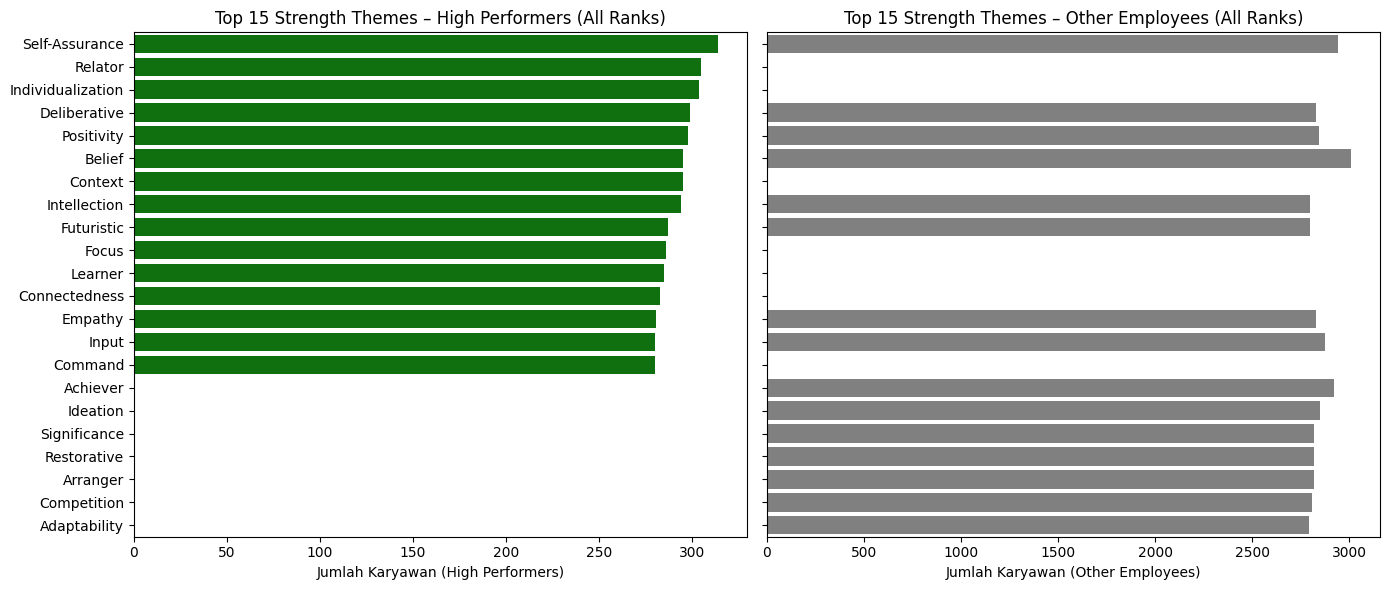

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pastikan kolom 'is_high' sudah ada (rating == 5 → 1)
# merged_df['is_high'] = (merged_df['rating'] == 5).astype(int)

# Ambil hanya kolom strength rank
strength_cols = [c for c in merged_df.columns if c.startswith('strength_rank_')]

# Ubah dari wide ke long agar bisa dihitung per tema
strength_long = merged_df.melt(
    id_vars=['employee_id', 'is_high'],
    value_vars=strength_cols,
    var_name='rank',
    value_name='theme'
).dropna(subset=['theme'])

# Hitung frekuensi tiap tema per kelompok
theme_freq = (
    strength_long.groupby(['is_high', 'theme'])
    .size()
    .reset_index(name='count')
)

# Normalisasi agar bisa dibandingkan proporsinya
theme_freq['percentage'] = theme_freq.groupby('is_high')['count'].transform(lambda x: x / x.sum() * 100)
theme_freq_high = theme_freq[theme_freq['is_high'] == 1].sort_values('percentage', ascending=False).head(15)
theme_freq_other = theme_freq[theme_freq['is_high'] == 0].sort_values('percentage', ascending=False).head(15)

# Ambil 15 tema paling sering muncul berdasarkan JUMLAH (bukan persentase)
theme_freq_high = (
    theme_freq[theme_freq['is_high'] == 1]
    .sort_values('count', ascending=False)
    .head(15)
)
theme_freq_other = (
    theme_freq[theme_freq['is_high'] == 0]
    .sort_values('count', ascending=False)
    .head(15)
)

# Buat 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(
    data=theme_freq_high,
    y='theme', x='count', ax=axes[0], color='green'
)
axes[0].set_title('Top 15 Strength Themes – High Performers (All Ranks)')
axes[0].set_xlabel('Jumlah Karyawan (High Performers)')
axes[0].set_ylabel('')

sns.barplot(
    data=theme_freq_other,
    y='theme', x='count', ax=axes[1], color='gray'
)
axes[1].set_title('Top 15 Strength Themes – Other Employees (All Ranks)')
axes[1].set_xlabel('Jumlah Karyawan (Other Employees)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [124]:
strength_cols

['strength_rank_1',
 'strength_rank_2',
 'strength_rank_3',
 'strength_rank_4',
 'strength_rank_5',
 'strength_rank_6',
 'strength_rank_7',
 'strength_rank_8',
 'strength_rank_9',
 'strength_rank_10',
 'strength_rank_11',
 'strength_rank_12',
 'strength_rank_13',
 'strength_rank_14']

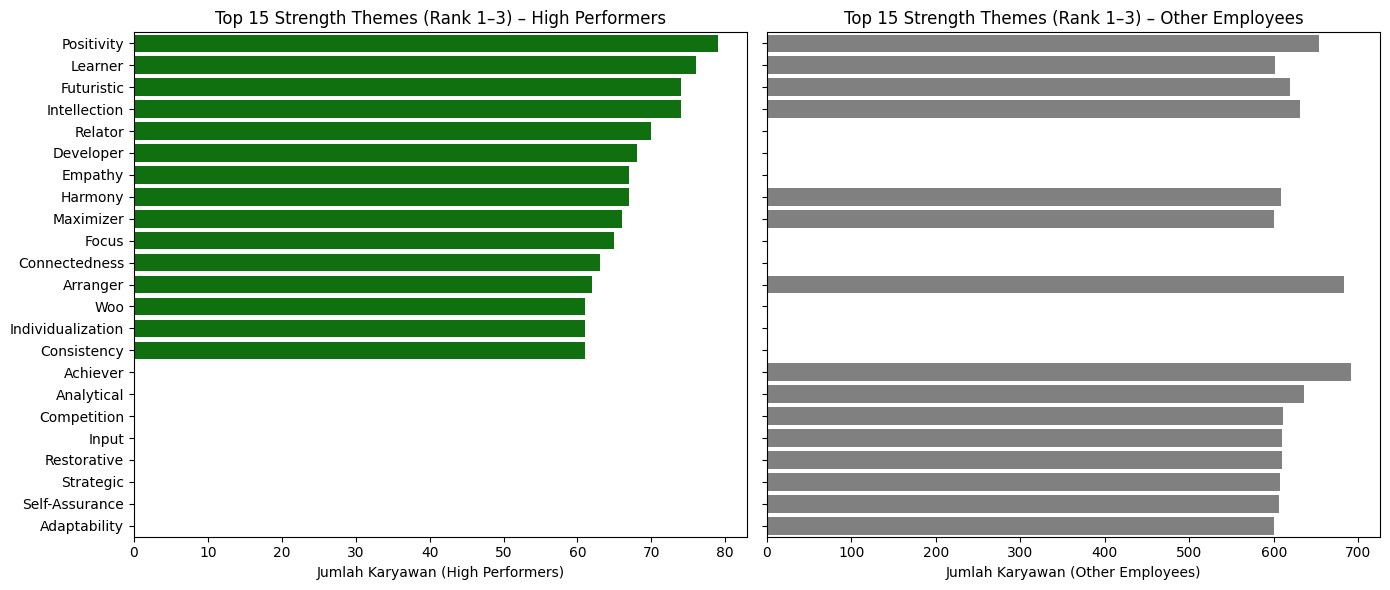

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Ambil hanya 3 Strength teratas ---
strength_cols_3 = ['strength_rank_1', 'strength_rank_2', 'strength_rank_3']

# Ubah dari wide ke long agar bisa dihitung per tema
strength_long = merged_df.melt(
    id_vars=['employee_id', 'is_high'],
    value_vars=strength_cols_3,
    var_name='rank',
    value_name='theme'
).dropna(subset=['theme'])

# Hitung frekuensi tiap tema per kelompok
theme_freq = (
    strength_long.groupby(['is_high', 'theme'])
    .size()
    .reset_index(name='count')
)

# Normalisasi agar bisa dibandingkan proporsinya
theme_freq['percentage'] = theme_freq.groupby('is_high')['count'].transform(lambda x: x / x.sum() * 100)

# Ambil 15 tema paling sering muncul berdasarkan jumlah
theme_freq_high = (
    theme_freq[theme_freq['is_high'] == 1]
    .sort_values('count', ascending=False)
    .head(15)
)
theme_freq_other = (
    theme_freq[theme_freq['is_high'] == 0]
    .sort_values('count', ascending=False)
    .head(15)
)

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(
    data=theme_freq_high,
    y='theme', x='count', ax=axes[0], color='green'
)
axes[0].set_title('Top 15 Strength Themes (Rank 1–3) – High Performers')
axes[0].set_xlabel('Jumlah Karyawan (High Performers)')
axes[0].set_ylabel('')

sns.barplot(
    data=theme_freq_other,
    y='theme', x='count', ax=axes[1], color='gray'
)
axes[1].set_title('Top 15 Strength Themes (Rank 1–3) – Other Employees')
axes[1].set_xlabel('Jumlah Karyawan (Other Employees)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


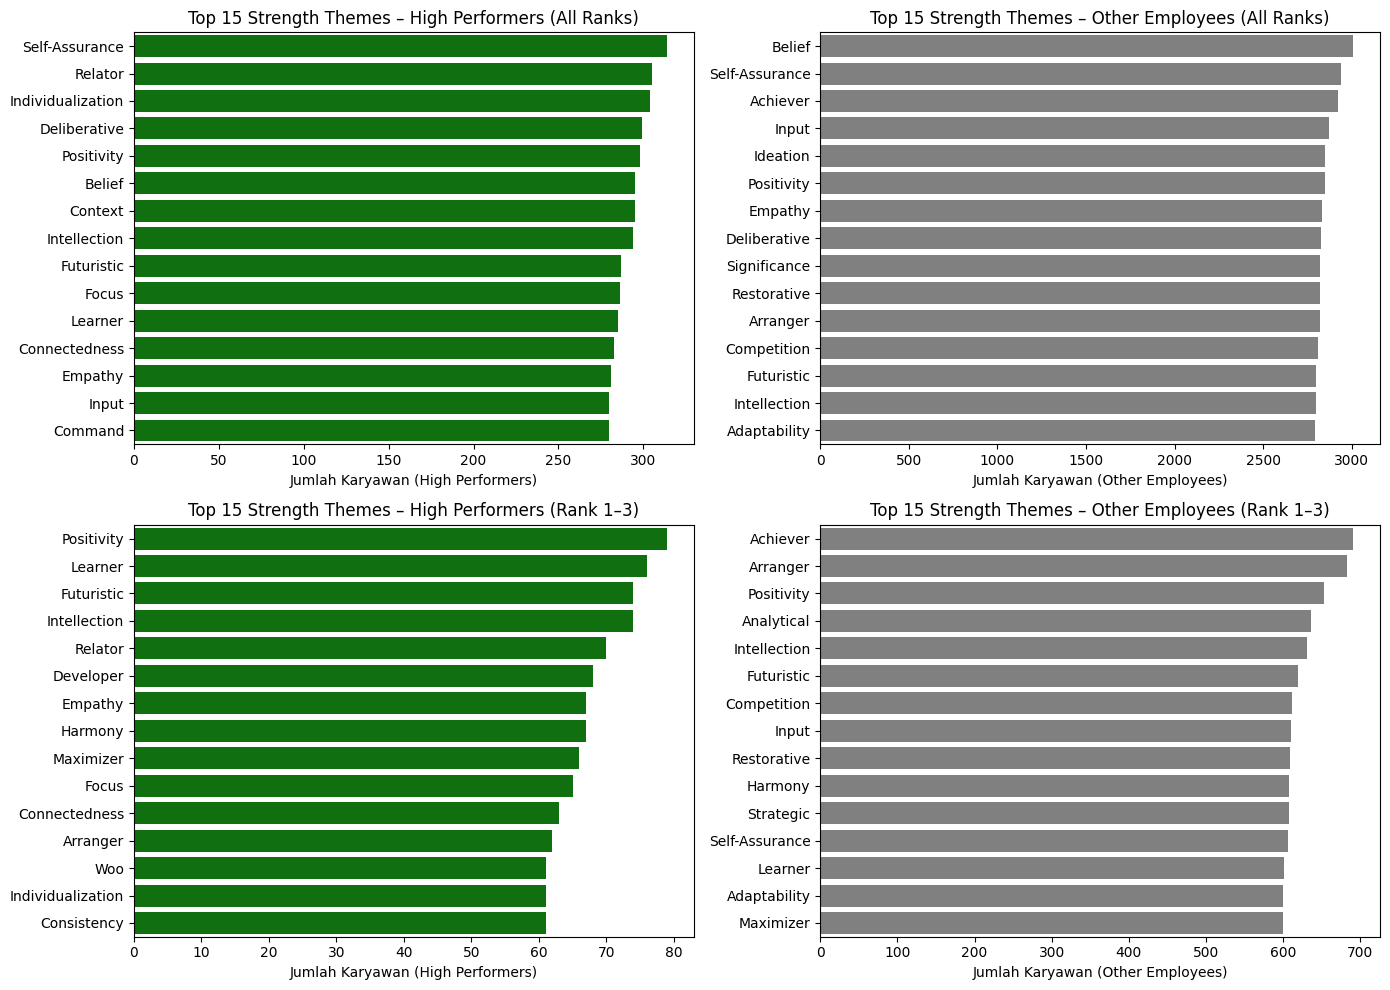

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ================================================
# 🔹 1. Semua Strength (Rank 1–14 dst.)
# ================================================
strength_cols_all = [c for c in merged_df.columns if c.startswith('strength_rank_')]

strength_long_all = merged_df.melt(
    id_vars=['employee_id', 'is_high'],
    value_vars=strength_cols_all,
    var_name='rank',
    value_name='theme'
).dropna(subset=['theme'])

theme_freq_all = (
    strength_long_all.groupby(['is_high', 'theme'])
    .size()
    .reset_index(name='count')
)

theme_freq_all_high = (
    theme_freq_all[theme_freq_all['is_high'] == 1]
    .sort_values('count', ascending=False)
    .head(15)
)
theme_freq_all_other = (
    theme_freq_all[theme_freq_all['is_high'] == 0]
    .sort_values('count', ascending=False)
    .head(15)
)

# ================================================
# 🔹 2. Hanya Rank 1–3
# ================================================
strength_cols_3 = ['strength_rank_1', 'strength_rank_2', 'strength_rank_3']

strength_long_3 = merged_df.melt(
    id_vars=['employee_id', 'is_high'],
    value_vars=strength_cols_3,
    var_name='rank',
    value_name='theme'
).dropna(subset=['theme'])

theme_freq_3 = (
    strength_long_3.groupby(['is_high', 'theme'])
    .size()
    .reset_index(name='count')
)

theme_freq_3_high = (
    theme_freq_3[theme_freq_3['is_high'] == 1]
    .sort_values('count', ascending=False)
    .head(15)
)
theme_freq_3_other = (
    theme_freq_3[theme_freq_3['is_high'] == 0]
    .sort_values('count', ascending=False)
    .head(15)
)

# ================================================
# 🔹 3. Plot 4 Subplot (2 baris × 2 kolom)
# ================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=False)

# --- Baris 1: Semua Rank ---
sns.barplot(
    data=theme_freq_all_high,
    y='theme', x='count', ax=axes[0, 0], color='green'
)
axes[0, 0].set_title('Top 15 Strength Themes – High Performers (All Ranks)')
axes[0, 0].set_xlabel('Jumlah Karyawan (High Performers)')
axes[0, 0].set_ylabel('')

sns.barplot(
    data=theme_freq_all_other,
    y='theme', x='count', ax=axes[0, 1], color='gray'
)
axes[0, 1].set_title('Top 15 Strength Themes – Other Employees (All Ranks)')
axes[0, 1].set_xlabel('Jumlah Karyawan (Other Employees)')
axes[0, 1].set_ylabel('')

# --- Baris 2: Rank 1–3 ---
sns.barplot(
    data=theme_freq_3_high,
    y='theme', x='count', ax=axes[1, 0], color='green'
)
axes[1, 0].set_title('Top 15 Strength Themes – High Performers (Rank 1–3)')
axes[1, 0].set_xlabel('Jumlah Karyawan (High Performers)')
axes[1, 0].set_ylabel('')

sns.barplot(
    data=theme_freq_3_other,
    y='theme', x='count', ax=axes[1, 1], color='gray'
)
axes[1, 1].set_title('Top 15 Strength Themes – Other Employees (Rank 1–3)')
axes[1, 1].set_xlabel('Jumlah Karyawan (Other Employees)')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()


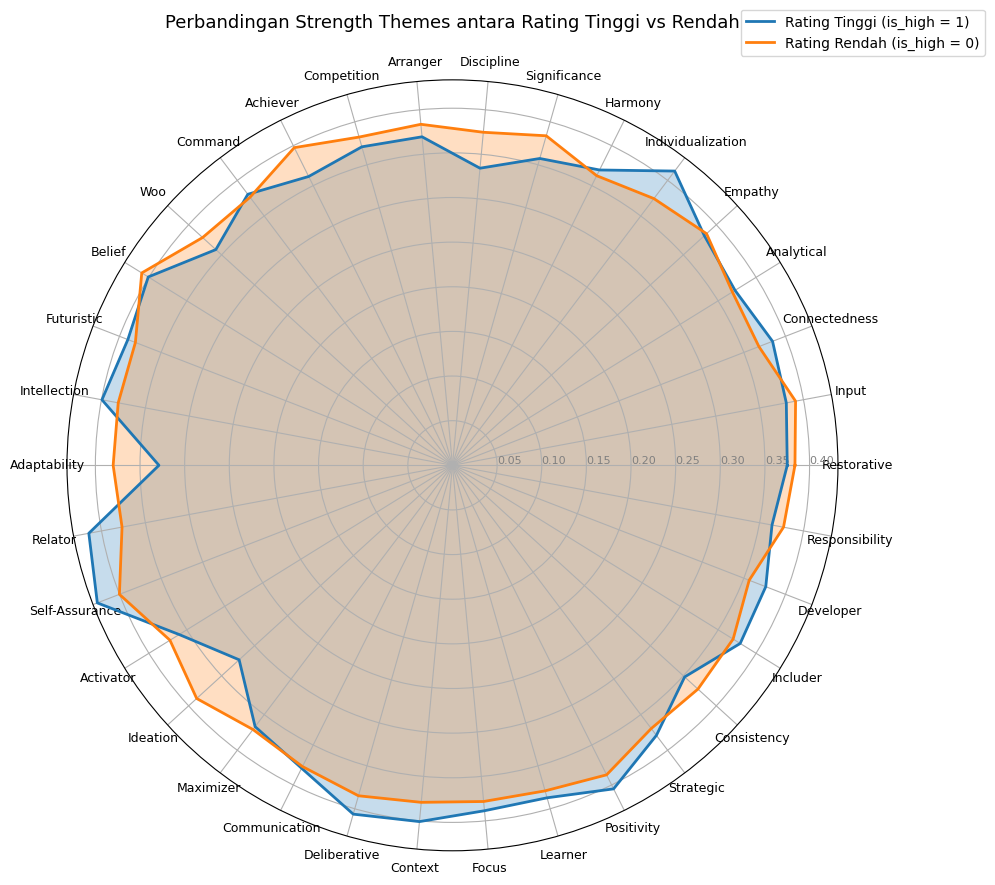

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil semua nama tema unik dari kolom strength_rank

themes = merged_df[strength_cols].melt(value_name='theme')['theme'].dropna().unique()

# Buat kolom 0/1 apakah tema tersebut muncul di 3 besar seseorang
for t in themes:
    merged_df[t] = merged_df[strength_cols].eq(t).any(axis=1).astype(int)

# Hitung rata-rata tiap theme untuk dua kelompok
mean_high = merged_df[merged_df['is_high'] == 1][themes].mean()
mean_low = merged_df[merged_df['is_high'] == 0][themes].mean()

# Siapkan data
labels = np.array(themes)
stats_high = mean_high.values
stats_low = mean_low.values

# Radar chart butuh titik awal & penutup sama
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
stats_high = np.concatenate((stats_high, [stats_high[0]]))
stats_low = np.concatenate((stats_low, [stats_low[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Buat radar plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Plot dua grup
ax.plot(angles, stats_high, linewidth=2, label='Rating Tinggi (is_high = 1)')
ax.fill(angles, stats_high, alpha=0.25)

ax.plot(angles, stats_low, linewidth=2, label='Rating Rendah (is_high = 0)')
ax.fill(angles, stats_low, alpha=0.25)

# Label & tampilan
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.set_rlabel_position(0)
plt.yticks(color="grey", size=8)
plt.title("Perbandingan Strength Themes antara Rating Tinggi vs Rendah", size=13, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


Kolom yang digunakan: ['strength_rank_1', 'strength_rank_2', 'strength_rank_3']


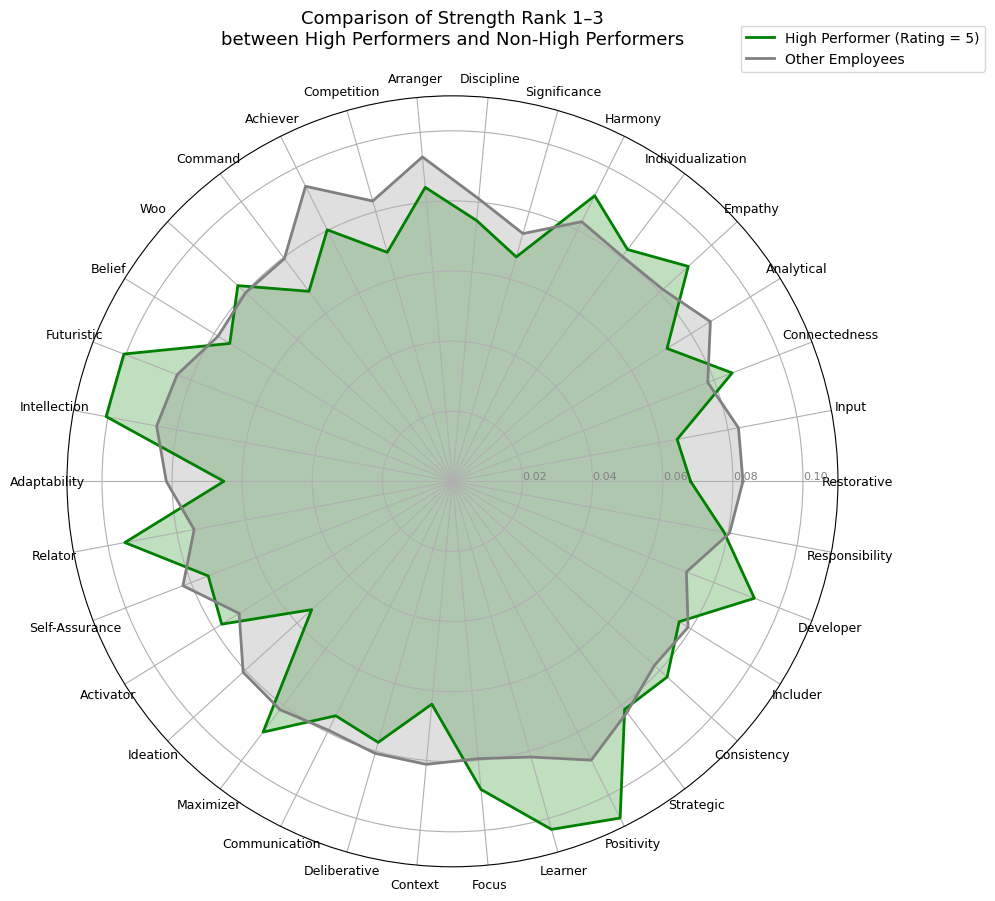

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1. Siapkan data dasar ===
# Pastikan kamu sudah punya kolom 'is_high' (1 = rating 5, 0 = lainnya)
# merged_df['is_high'] = (merged_df['rating'] == 5).astype(int)

# Ambil hanya rank 1–3
top3_cols = [f'strength_rank_{i}' for i in range(1, 4)]

# Pastikan kolom tersebut ada di dataset
available_cols = [c for c in top3_cols if c in merged_df.columns]
print(f"Kolom yang digunakan: {available_cols}")

# === 2. Ambil semua theme unik dari rank 1–3 ===
themes_top3 = merged_df[available_cols].melt(value_name='theme')['theme'].dropna().unique()

# === 3. Buat kolom dummy (0/1) untuk setiap theme, berdasarkan apakah muncul di rank 1–3 ===
for theme in themes_top3:
    merged_df[theme] = merged_df[available_cols].eq(theme).any(axis=1).astype(int)

# === 4. Hitung rata-rata kemunculan setiap theme untuk dua kelompok ===
mean_high = merged_df[merged_df['is_high'] == 1][themes_top3].mean()
mean_low = merged_df[merged_df['is_high'] == 0][themes_top3].mean()

# === 5. Siapkan data radar ===
labels = np.array(themes_top3)
stats_high = mean_high.values
stats_low = mean_low.values

# Radar chart perlu titik awal dan akhir sama
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
stats_high = np.concatenate((stats_high, [stats_high[0]]))
stats_low = np.concatenate((stats_low, [stats_low[0]]))
angles = np.concatenate((angles, [angles[0]]))

# === 6. Buat radar plot ===
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Plot dua grup
ax.plot(angles, stats_high, linewidth=2, color='green', label='High Performer (Rating = 5)')
ax.fill(angles, stats_high, color='green', alpha=0.25)

ax.plot(angles, stats_low, linewidth=2, color='gray', label='Other Employees')
ax.fill(angles, stats_low, color='gray', alpha=0.25)

# === 7. Atur tampilan ===
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.set_rlabel_position(0)
plt.yticks(color="grey", size=8)
plt.title("Comparison of Strength Rank 1–3\nbetween High Performers and Non-High Performers", size=13, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


Kolom yang digunakan: ['strength_rank_1', 'strength_rank_2', 'strength_rank_3']


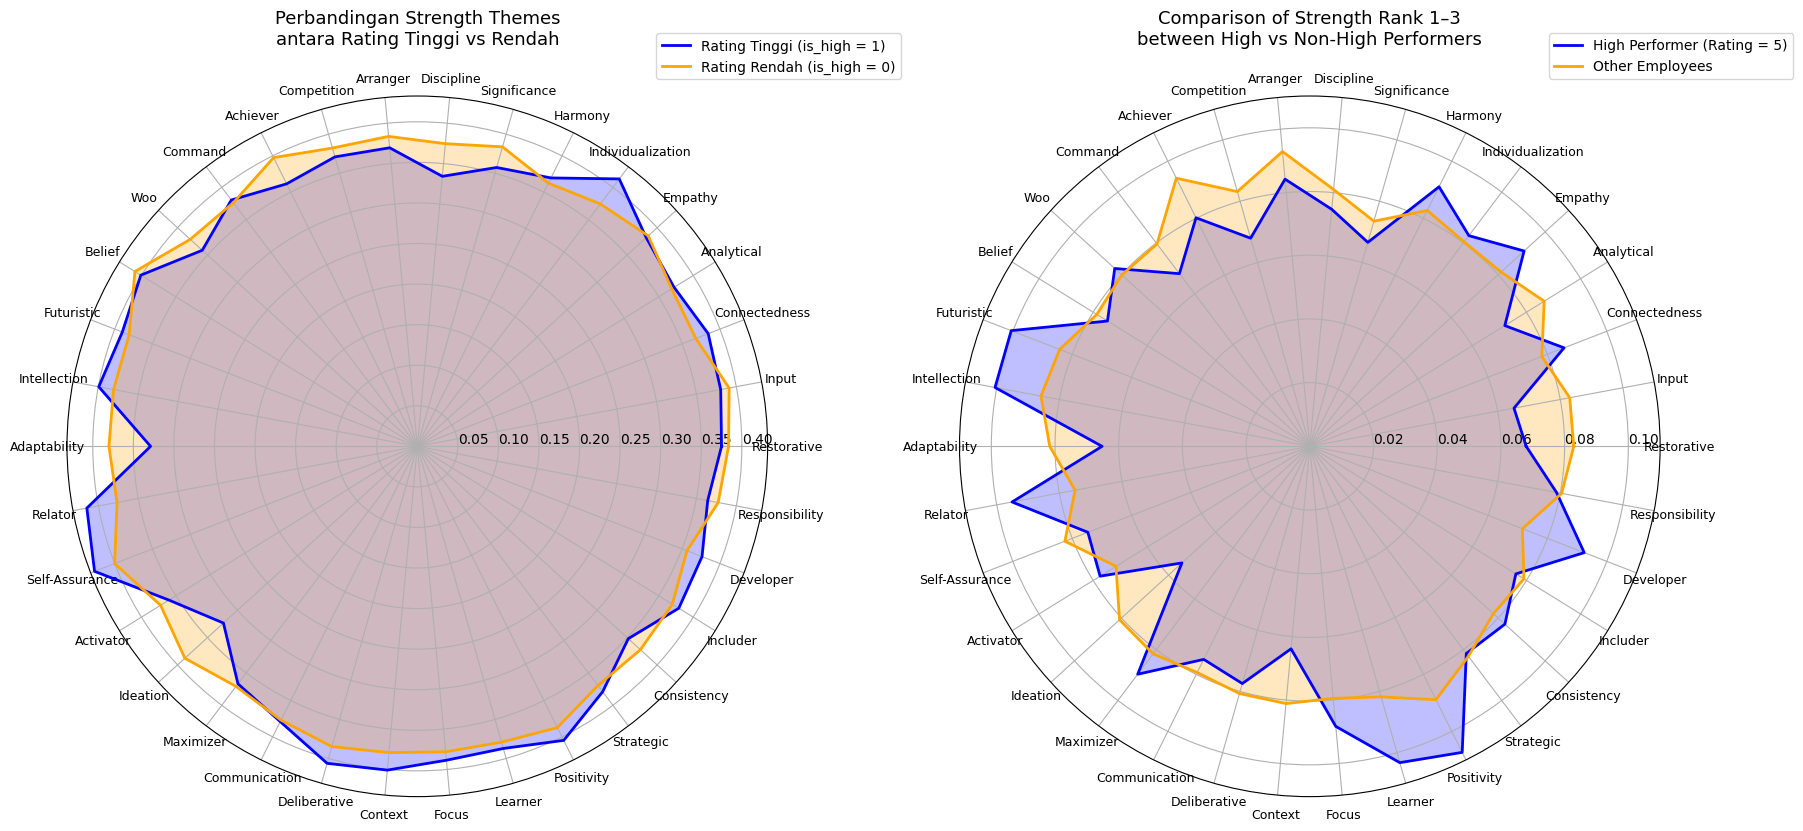

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1. Radar chart versi strength_cols ===
themes = merged_df[strength_cols].melt(value_name='theme')['theme'].dropna().unique()

for t in themes:
    merged_df[t] = merged_df[strength_cols].eq(t).any(axis=1).astype(int)

mean_high_1 = merged_df[merged_df['is_high'] == 1][themes].mean()
mean_low_1 = merged_df[merged_df['is_high'] == 0][themes].mean()

labels_1 = np.array(themes)
stats_high_1 = np.concatenate((mean_high_1.values, [mean_high_1.values[0]]))
stats_low_1 = np.concatenate((mean_low_1.values, [mean_low_1.values[0]]))
angles_1 = np.linspace(0, 2 * np.pi, len(labels_1), endpoint=False)
angles_1 = np.concatenate((angles_1, [angles_1[0]]))

# === 2. Radar chart versi top 3 rank ===
top3_cols = [f'strength_rank_{i}' for i in range(1, 4)]
available_cols = [c for c in top3_cols if c in merged_df.columns]
print(f"Kolom yang digunakan: {available_cols}")

themes_top3 = merged_df[available_cols].melt(value_name='theme')['theme'].dropna().unique()

for theme in themes_top3:
    merged_df[theme] = merged_df[available_cols].eq(theme).any(axis=1).astype(int)

mean_high_2 = merged_df[merged_df['is_high'] == 1][themes_top3].mean()
mean_low_2 = merged_df[merged_df['is_high'] == 0][themes_top3].mean()

labels_2 = np.array(themes_top3)
stats_high_2 = np.concatenate((mean_high_2.values, [mean_high_2.values[0]]))
stats_low_2 = np.concatenate((mean_low_2.values, [mean_low_2.values[0]]))
angles_2 = np.linspace(0, 2 * np.pi, len(labels_2), endpoint=False)
angles_2 = np.concatenate((angles_2, [angles_2[0]]))

# === 3. Plot dua radar chart berdampingan ===
fig, axes = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(18, 9))

# --- Subplot kiri: Strength_cols ---
ax = axes[0]
ax.plot(angles_1, stats_high_1, linewidth=2, color='blue', label='Rating Tinggi (is_high = 1)')
ax.fill(angles_1, stats_high_1, color='blue', alpha=0.25)

ax.plot(angles_1, stats_low_1, linewidth=2, color='orange', label='Rating Rendah (is_high = 0)')
ax.fill(angles_1, stats_low_1, color='orange', alpha=0.25)

ax.set_xticks(angles_1[:-1])
ax.set_xticklabels(labels_1, fontsize=9)
ax.set_rlabel_position(0)
ax.set_title("Perbandingan Strength Themes\nantara Rating Tinggi vs Rendah", size=13, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# --- Subplot kanan: Rank 1–3 ---
ax = axes[1]
ax.plot(angles_2, stats_high_2, linewidth=2, color='blue', label='High Performer (Rating = 5)')
ax.fill(angles_2, stats_high_2, color='blue', alpha=0.25)

ax.plot(angles_2, stats_low_2, linewidth=2, color='orange', label='Other Employees')
ax.fill(angles_2, stats_low_2, color='orange', alpha=0.25)

ax.set_xticks(angles_2[:-1])
ax.set_xticklabels(labels_2, fontsize=9)
ax.set_rlabel_position(0)
ax.set_title("Comparison of Strength Rank 1–3\nbetween High vs Non-High Performers", size=13, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()


C:\Users\fajar\AppData\Local\Temp\ipykernel_39420\838770780.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_rating.values, y=corr_with_rating.index, palette='crest')


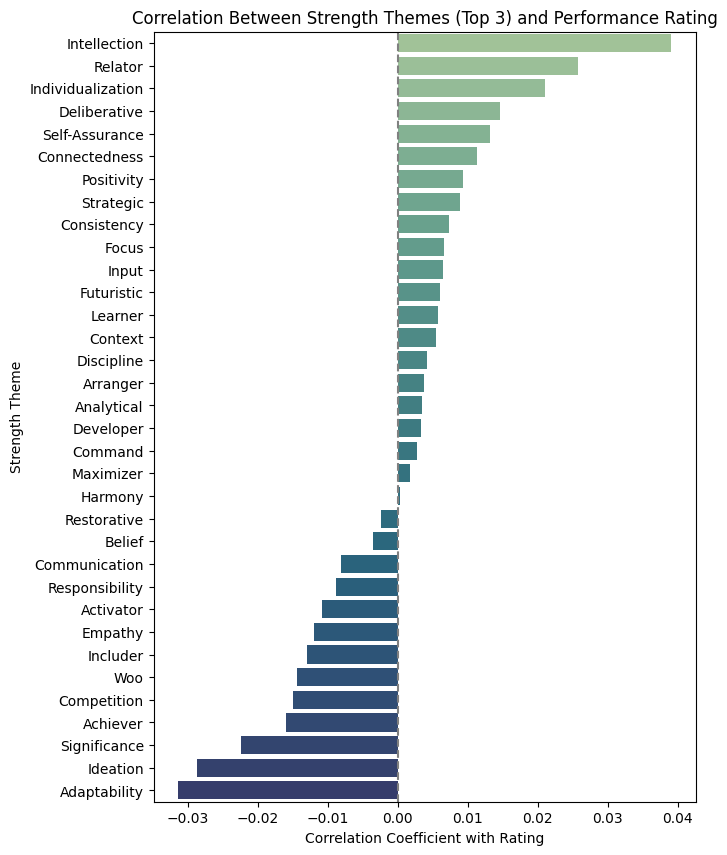

Top 10 Positive Correlations with Rating:


Intellection         0.039101
Relator              0.025722
Individualization    0.021076
Deliberative         0.014655
Self-Assurance       0.013130
Connectedness        0.011343
Positivity           0.009252
Strategic            0.008868
Consistency          0.007341
Focus                0.006659
Name: rating, dtype: float64


Top 10 Negative Correlations with Rating:


Responsibility   -0.008829
Activator        -0.010803
Empathy          -0.012034
Includer         -0.012963
Woo              -0.014347
Competition      -0.014982
Achiever         -0.016022
Significance     -0.022421
Ideation         -0.028636
Adaptability     -0.031392
Name: rating, dtype: float64

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bentuk long format
strength_long = merged_df.melt(
    id_vars=['employee_id', 'rating'],
    value_vars=strength_cols,
    var_name='rank',
    value_name='theme'
).dropna(subset=['theme'])

# Buat binary matrix: 1 jika tema ada di Top 3, 0 jika tidak
binary_matrix = (
    strength_long
    .pivot_table(index='employee_id', columns='theme', values='rank', aggfunc='count', fill_value=0)
    .reset_index()
)

# Gabungkan kembali dengan rating karyawan
binary_matrix = binary_matrix.merge(merged_df[['employee_id', 'rating']], on='employee_id')

# Hitung korelasi antar tema dengan rating
corr_with_rating = binary_matrix.corr(numeric_only=True)['rating'].drop('rating').sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(7,10))
sns.barplot(x=corr_with_rating.values, y=corr_with_rating.index, palette='crest')
plt.title('Correlation Between Strength Themes and Performance Rating')
plt.xlabel('Correlation Coefficient with Rating')
plt.ylabel('Strength Theme')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

# Tampilkan tabel korelasi tertinggi dan terendah
print("Top 10 Positive Correlations with Rating:")
display(corr_with_rating.head(10))

print("\nTop 10 Negative Correlations with Rating:")
display(corr_with_rating.tail(10))


Kolom yang digunakan: ['strength_rank_1', 'strength_rank_2', 'strength_rank_3']


C:\Users\fajar\AppData\Local\Temp\ipykernel_39420\960325962.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_rating_top3.values, y=corr_with_rating_top3.index, palette='crest')


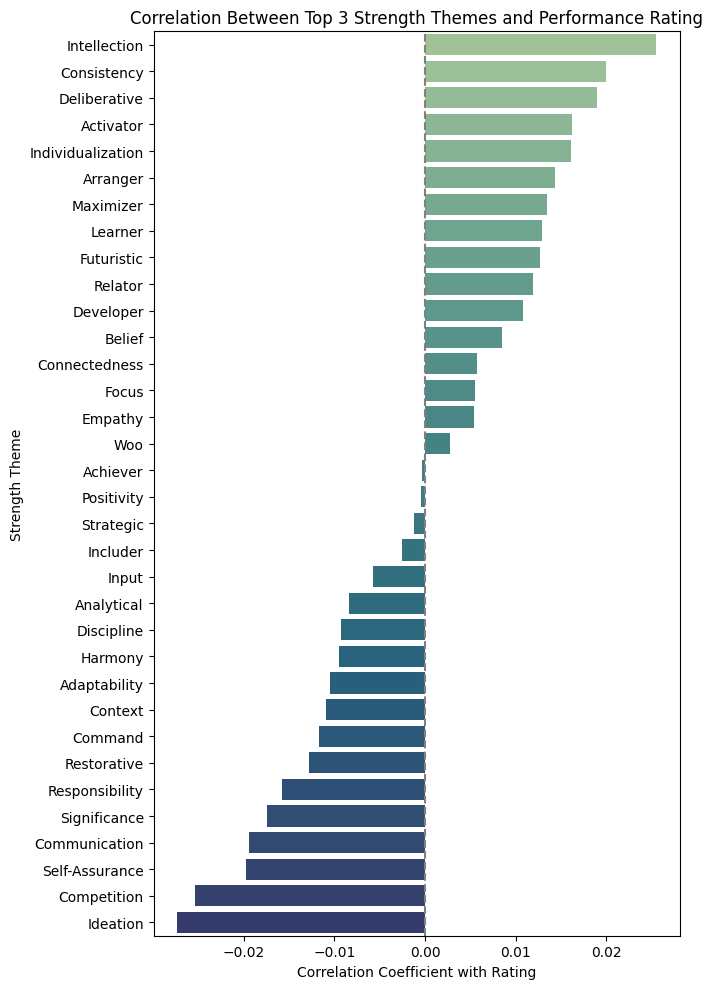

Top 10 Positive Correlations with Rating:


Intellection         0.025467
Consistency          0.019998
Deliberative         0.018933
Activator            0.016249
Individualization    0.016042
Arranger             0.014351
Maximizer            0.013401
Learner              0.012916
Futuristic           0.012712
Relator              0.011944
Name: rating, dtype: float64


Top 10 Negative Correlations with Rating:


Adaptability     -0.010507
Context          -0.010870
Command          -0.011638
Restorative      -0.012763
Responsibility   -0.015760
Significance     -0.017371
Communication    -0.019359
Self-Assurance   -0.019686
Competition      -0.025408
Ideation         -0.027290
Name: rating, dtype: float64

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Ambil hanya kolom rank 1–3 ===
top3_cols = [f'strength_rank_{i}' for i in range(1, 4)]
available_cols = [c for c in top3_cols if c in merged_df.columns]
print(f"Kolom yang digunakan: {available_cols}")

# === 2. Bentuk long format hanya dari rank 1–3 ===
strength_long_top3 = merged_df.melt(
    id_vars=['employee_id', 'rating'],
    value_vars=available_cols,
    var_name='rank',
    value_name='theme'
).dropna(subset=['theme'])

# === 3. Buat binary matrix: 1 jika tema muncul di Top 3, 0 jika tidak ===
binary_matrix_top3 = (
    strength_long_top3
    .pivot_table(index='employee_id', columns='theme', values='rank', aggfunc='count', fill_value=0)
    .reset_index()
)

# === 4. Gabungkan dengan rating ===
binary_matrix_top3 = binary_matrix_top3.merge(merged_df[['employee_id', 'rating']], on='employee_id')

# === 5. Hitung korelasi antar tema dan rating ===
corr_with_rating_top3 = binary_matrix_top3.corr(numeric_only=True)['rating'].drop('rating').sort_values(ascending=False)

# === 6. Visualisasi korelasi ===
plt.figure(figsize=(7, 10))
sns.barplot(x=corr_with_rating_top3.values, y=corr_with_rating_top3.index, palette='crest')
plt.title('Correlation Between Top 3 Strength Themes and Performance Rating')
plt.xlabel('Correlation Coefficient with Rating')
plt.ylabel('Strength Theme')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# === 7. Tabel korelasi tertinggi dan terendah ===
print("Top 10 Positive Correlations with Rating:")
display(corr_with_rating_top3.head(10))

print("\nTop 10 Negative Correlations with Rating:")
display(corr_with_rating_top3.tail(10))


C:\Users\fajar\AppData\Local\Temp\ipykernel_39420\194901222.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_top3.values, y=corr_top3.index, palette=common_palette, ax=axes[0])
C:\Users\fajar\AppData\Local\Temp\ipykernel_39420\194901222.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_all.values, y=corr_all.index, palette=common_palette, ax=axes[1])


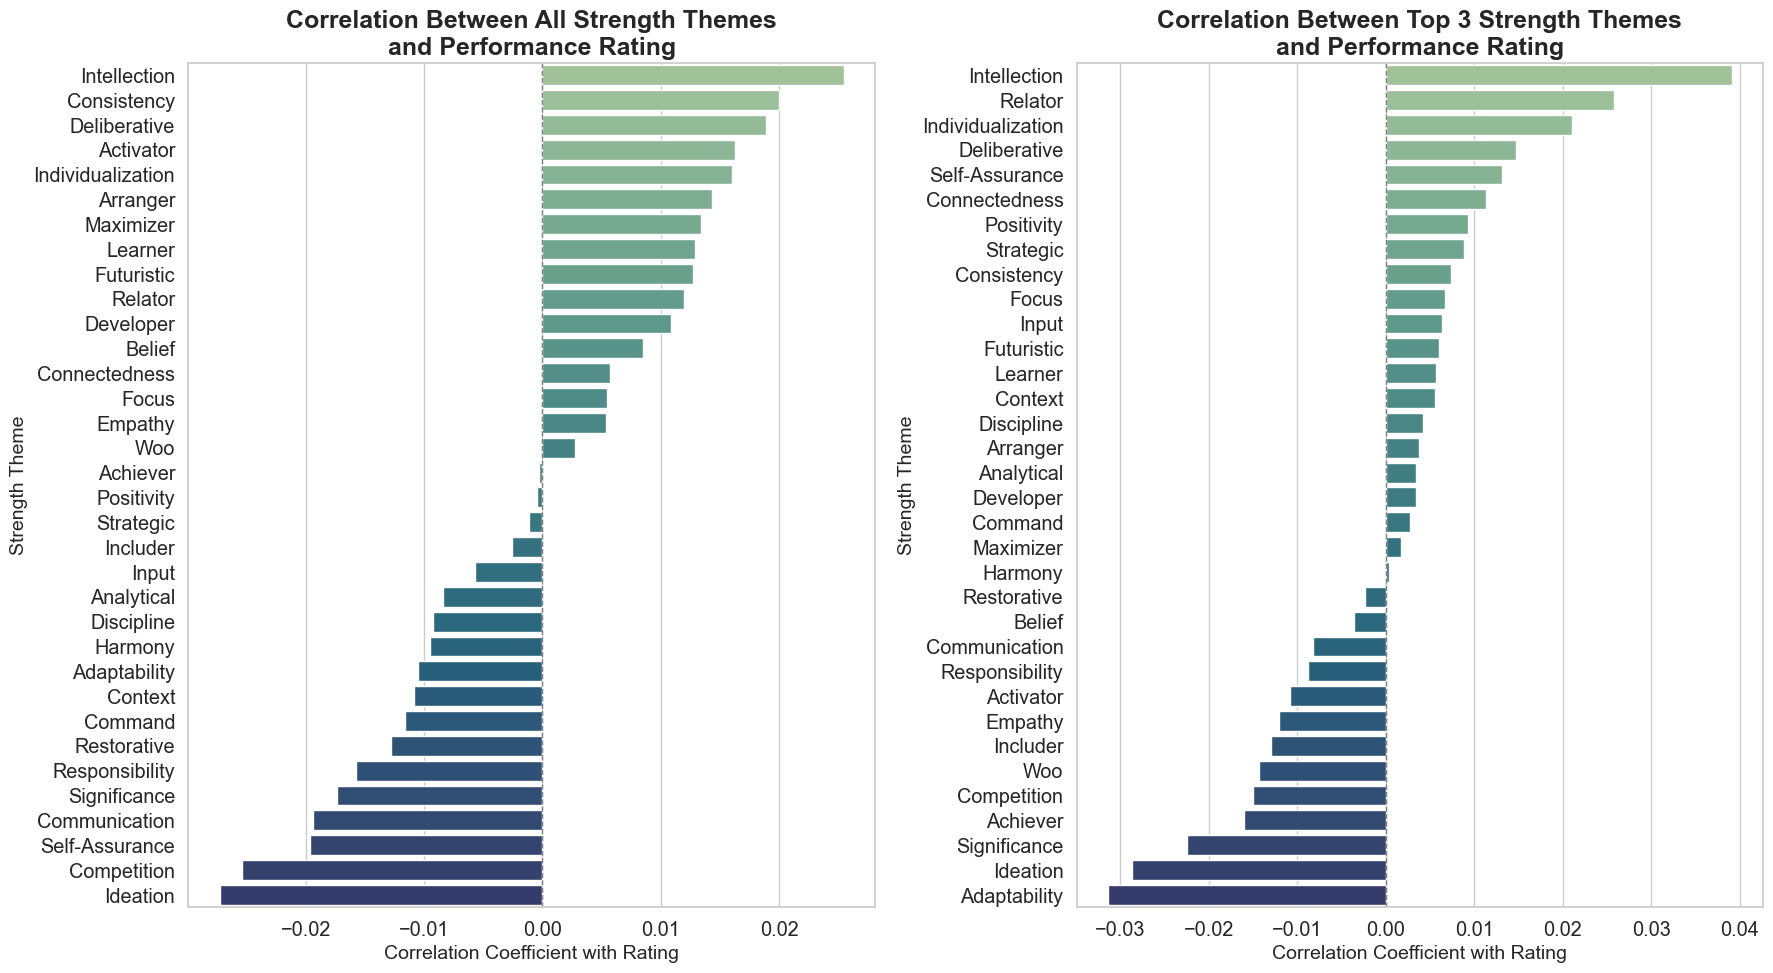

=== Top 10 Positive Correlations (Top 3 Strengths) ===


Intellection         0.025467
Consistency          0.019998
Deliberative         0.018933
Activator            0.016249
Individualization    0.016042
Arranger             0.014351
Maximizer            0.013401
Learner              0.012916
Futuristic           0.012712
Relator              0.011944
Name: rating, dtype: float64


=== Top 10 Negative Correlations (Top 3 Strengths) ===


Adaptability     -0.010507
Context          -0.010870
Command          -0.011638
Restorative      -0.012763
Responsibility   -0.015760
Significance     -0.017371
Communication    -0.019359
Self-Assurance   -0.019686
Competition      -0.025408
Ideation         -0.027290
Name: rating, dtype: float64


=== Top 10 Positive Correlations (All Strengths) ===


Intellection         0.039101
Relator              0.025722
Individualization    0.021076
Deliberative         0.014655
Self-Assurance       0.013130
Connectedness        0.011343
Positivity           0.009252
Strategic            0.008868
Consistency          0.007341
Focus                0.006659
Name: rating, dtype: float64


=== Top 10 Negative Correlations (All Strengths) ===


Responsibility   -0.008829
Activator        -0.010803
Empathy          -0.012034
Includer         -0.012963
Woo              -0.014347
Competition      -0.014982
Achiever         -0.016022
Significance     -0.022421
Ideation         -0.028636
Adaptability     -0.031392
Name: rating, dtype: float64

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# =============================
# 🔹 1. Korelasi untuk Top 3 Strength Themes
# =============================

top3_cols = [f'strength_rank_{i}' for i in range(1, 4)]
available_cols = [c for c in top3_cols if c in merged_df.columns]

strength_long_top3 = merged_df.melt(
    id_vars=['employee_id', 'rating'],
    value_vars=available_cols,
    var_name='rank',
    value_name='theme'
).dropna(subset=['theme'])

binary_matrix_top3 = (
    strength_long_top3
    .pivot_table(index='employee_id', columns='theme', values='rank', aggfunc='count', fill_value=0)
    .reset_index()
)

binary_matrix_top3 = binary_matrix_top3.merge(merged_df[['employee_id', 'rating']], on='employee_id')

corr_top3 = binary_matrix_top3.corr(numeric_only=True)['rating'].drop('rating').sort_values(ascending=False)


# =============================
# 🔹 2. Korelasi untuk Semua Strength Themes
# =============================

strength_long_all = merged_df.melt(
    id_vars=['employee_id', 'rating'],
    value_vars=strength_cols,
    var_name='rank',
    value_name='theme'
).dropna(subset=['theme'])

binary_matrix_all = (
    strength_long_all
    .pivot_table(index='employee_id', columns='theme', values='rank', aggfunc='count', fill_value=0)
    .reset_index()
)

binary_matrix_all = binary_matrix_all.merge(merged_df[['employee_id', 'rating']], on='employee_id')

corr_all = binary_matrix_all.corr(numeric_only=True)['rating'].drop('rating').sort_values(ascending=False)


# =============================
# 🔹 3. Visualisasi Subplot Kiri–Kanan (warna sama, font besar)
# =============================

sns.set(style="whitegrid", font_scale=1.3)  # 🔸 Perbesar semua font
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
common_palette = sns.color_palette('crest', n_colors=len(corr_all))

# Subplot kiri: Top 3
sns.barplot(x=corr_top3.values, y=corr_top3.index, palette=common_palette, ax=axes[0])
axes[1].set_title('Correlation Between Top 3 Strength Themes\nand Performance Rating', fontsize=18, weight='bold')
axes[1].set_xlabel('Correlation Coefficient with Rating', fontsize=14)
axes[1].set_ylabel('Strength Theme', fontsize=14)
axes[1].axvline(0, color='gray', linestyle='--', linewidth=1)

# Subplot kanan: All
sns.barplot(x=corr_all.values, y=corr_all.index, palette=common_palette, ax=axes[1])
axes[0].set_title('Correlation Between All Strength Themes\nand Performance Rating', fontsize=18, weight='bold')
axes[0].set_xlabel('Correlation Coefficient with Rating', fontsize=14)
axes[0].set_ylabel('Strength Theme', fontsize=14)
axes[0].axvline(0, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


# =============================
# 🔹 4. Tabel Korelasi
# =============================

print("=== Top 10 Positive Correlations (Top 3 Strengths) ===")
display(corr_top3.head(10))

print("\n=== Top 10 Negative Correlations (Top 3 Strengths) ===")
display(corr_top3.tail(10))

print("\n=== Top 10 Positive Correlations (All Strengths) ===")
display(corr_all.head(10))

print("\n=== Top 10 Negative Correlations (All Strengths) ===")
display(corr_all.tail(10))


C:\Users\fajar\AppData\Local\Temp\ipykernel_39420\4163597805.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=theme_gap, y=theme_gap.index, x='Gap', palette='coolwarm')


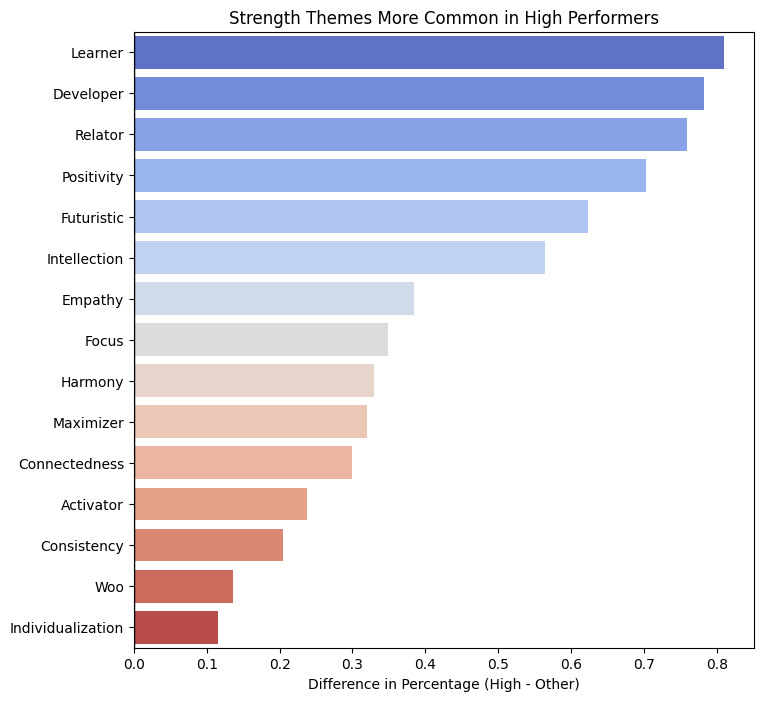

In [132]:
# Pivot agar tiap tema punya dua kolom: high vs other
theme_gap = theme_freq.pivot(index='theme', columns='is_high', values='percentage').fillna(0)
theme_gap.columns = ['Other', 'High']
theme_gap['Gap'] = theme_gap['High'] - theme_gap['Other']
theme_gap = theme_gap.sort_values('Gap', ascending=False).head(15)

# Visualisasi gap
plt.figure(figsize=(8, 8))
sns.barplot(data=theme_gap, y=theme_gap.index, x='Gap', palette='coolwarm')
plt.title('Strength Themes More Common in High Performers')
plt.xlabel('Difference in Percentage (High - Other)')
plt.ylabel('')
plt.axvline(0, color='black', linewidth=1)
plt.show()


Kolom yang digunakan: ['strength_rank_1', 'strength_rank_2', 'strength_rank_3']


C:\Users\fajar\AppData\Local\Temp\ipykernel_39420\445238857.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=theme_gap_top3, y=theme_gap_top3.index, x='Gap', palette='coolwarm')


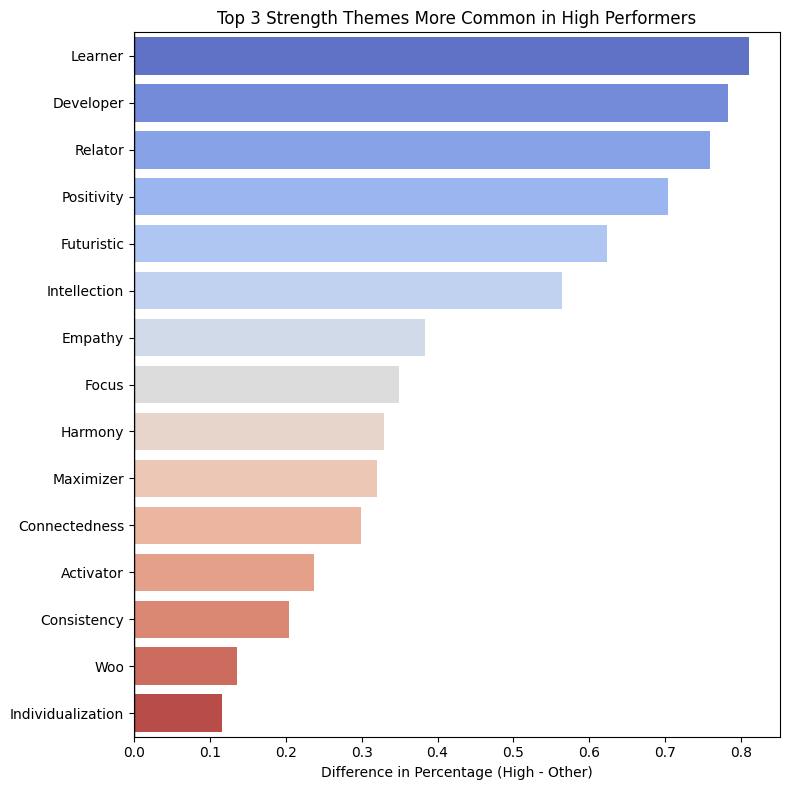

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Ambil hanya rank 1–3 ===
top3_cols = [f'strength_rank_{i}' for i in range(1, 4)]
available_cols = [c for c in top3_cols if c in merged_df.columns]
print(f"Kolom yang digunakan: {available_cols}")

# === 2. Hitung frekuensi tema di 3 besar untuk high vs other ===
theme_freq_top3 = (
    merged_df.melt(id_vars='is_high', value_vars=available_cols, value_name='theme')
    .dropna(subset=['theme'])
    .groupby(['theme', 'is_high'])
    .size()
    .reset_index(name='count')
)

# === 3. Ubah ke persentase terhadap total per kelompok high/other ===
total_per_group = theme_freq_top3.groupby('is_high')['count'].transform('sum')
theme_freq_top3['percentage'] = 100 * theme_freq_top3['count'] / total_per_group

# === 4. Pivot agar tiap tema punya dua kolom: High vs Other ===
theme_gap_top3 = theme_freq_top3.pivot(index='theme', columns='is_high', values='percentage').fillna(0)
theme_gap_top3.columns = ['Other', 'High']
theme_gap_top3['Gap'] = theme_gap_top3['High'] - theme_gap_top3['Other']

# === 5. Urutkan berdasarkan gap terbesar ===
theme_gap_top3 = theme_gap_top3.sort_values('Gap', ascending=False).head(15)

# === 6. Visualisasi ===
plt.figure(figsize=(8, 8))
sns.barplot(data=theme_gap_top3, y=theme_gap_top3.index, x='Gap', palette='coolwarm')
plt.title('Top 3 Strength Themes More Common in High Performers')
plt.xlabel('Difference in Percentage (High - Other)')
plt.ylabel('')
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()


In [148]:
display(theme_gap)
display(theme_gap_top3)

,Other,High,Gap
theme,,,
Learner,2.959133,3.769841,0.810708
Developer,2.589857,3.373016,0.783159
Relator,2.712949,3.472222,0.759273
Positivity,3.215165,3.918651,0.703486
Futuristic,3.047760,3.670635,0.622875
Intellection,3.106844,3.670635,0.563791
Empathy,2.939439,3.323413,0.383974
Focus,2.875431,3.224206,0.348776
Harmony,2.993599,3.323413,0.329813


,Other,High,Gap
theme,,,
Learner,2.959133,3.769841,0.810708
Developer,2.589857,3.373016,0.783159
Relator,2.712949,3.472222,0.759273
Positivity,3.215165,3.918651,0.703486
Futuristic,3.047760,3.670635,0.622875
Intellection,3.106844,3.670635,0.563791
Empathy,2.939439,3.323413,0.383974
Focus,2.875431,3.224206,0.348776
Harmony,2.993599,3.323413,0.329813


In [134]:
# Buat daftar semua tema unik
themes = pd.unique(strength_long['theme'].dropna())

# One-hot encode: buat kolom tema, isi 1 kalau karyawan punya tema tsb
for theme in themes:
    merged_df[theme] = merged_df[strength_cols].apply(lambda row: theme in row.values, axis=1).astype(int)

# Cek hasil
merged_df.head()


,employee_id,rating,year,strength_rank_1,strength_rank_2,strength_rank_3,strength_rank_4,strength_rank_5,strength_rank_6,strength_rank_7,strength_rank_8,strength_rank_9,strength_rank_10,strength_rank_11,strength_rank_12,strength_rank_13,strength_rank_14,is_high,Restorative,Input,Connectedness,Analytical,Empathy,Individualization,Harmony,Significance,Discipline,Arranger,Competition,Achiever,Command,Woo,Belief,Futuristic,Intellection,Adaptability,Relator,Self-Assurance,Activator,Ideation,Maximizer,Communication,Deliberative,Context,Focus,Learner,Positivity,Strategic,Consistency,Includer,Developer,Responsibility
0,EMP100000,2.0,2021,NaN,Adaptability,Context,Competition,Activator,Positivity,Significance,Empathy,Ideation,Developer,Communication,Command,Analytical,Intellection,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0
1,EMP100002,2.0,2021,Restorative,Maximizer,Woo,Includer,Command,NaN,Futuristic,Focus,NaN,NaN,Analytical,NaN,NaN,Positivity,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
2,EMP100005,NaN,2021,Input,Relator,Woo,Deliberative,Consistency,NaN,Includer,Empathy,Restorative,Responsibility,Belief,Learner,Arranger,Significance,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1
3,EMP100006,4.0,2021,Input,Analytical,Responsibility,Maximizer,Self-Assurance,Deliberative,NaN,Achiever,Intellection,Consistency,Discipline,Relator,Arranger,Learner,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1
4,EMP100007,4.0,2021,Connectedness,Strategic,Consistency,Communication,Focus,Positivity,Adaptability,Maximizer,Individualization,Context,Includer,Belief,Discipline,Woo,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0


In [135]:
themes

array(['Restorative', 'Input', 'Connectedness', 'Analytical', 'Empathy',
       'Individualization', 'Harmony', 'Significance', 'Discipline',
       'Arranger', 'Competition', 'Achiever', 'Command', 'Woo', 'Belief',
       'Futuristic', 'Intellection', 'Adaptability', 'Relator',
       'Self-Assurance', 'Activator', 'Ideation', 'Maximizer',
       'Communication', 'Deliberative', 'Context', 'Focus', 'Learner',
       'Positivity', 'Strategic', 'Consistency', 'Includer', 'Developer',
       'Responsibility'], dtype=object)

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = merged_df[themes]
y = merged_df['is_high']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

importance = pd.DataFrame({
    'Theme': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values('Coefficient', ascending=False)

display(importance.head(15))


,Theme,Coefficient
25,Context,0.142119
5,Individualization,0.091162
32,Developer,0.080620
22,Maximizer,0.069081
18,Relator,0.061270
16,Intellection,0.057113
27,Learner,0.046516
2,Connectedness,0.039272
28,Positivity,0.038798
3,Analytical,0.019850


In [137]:
merged_df

,employee_id,rating,year,strength_rank_1,strength_rank_2,strength_rank_3,strength_rank_4,strength_rank_5,strength_rank_6,strength_rank_7,strength_rank_8,strength_rank_9,strength_rank_10,strength_rank_11,strength_rank_12,strength_rank_13,strength_rank_14,is_high,Restorative,Input,Connectedness,Analytical,Empathy,Individualization,Harmony,Significance,Discipline,Arranger,Competition,Achiever,Command,Woo,Belief,Futuristic,Intellection,Adaptability,Relator,Self-Assurance,Activator,Ideation,Maximizer,Communication,Deliberative,Context,Focus,Learner,Positivity,Strategic,Consistency,Includer,Developer,Responsibility
0,EMP100000,2.0,2021,NaN,Adaptability,Context,Competition,Activator,Positivity,Significance,Empathy,Ideation,Developer,Communication,Command,Analytical,Intellection,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0
1,EMP100002,2.0,2021,Restorative,Maximizer,Woo,Includer,Command,NaN,Futuristic,Focus,NaN,NaN,Analytical,NaN,NaN,Positivity,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
2,EMP100005,NaN,2021,Input,Relator,Woo,Deliberative,Consistency,NaN,Includer,Empathy,Restorative,Responsibility,Belief,Learner,Arranger,Significance,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1
3,EMP100006,4.0,2021,Input,Analytical,Responsibility,Maximizer,Self-Assurance,Deliberative,NaN,Achiever,Intellection,Consistency,Discipline,Relator,Arranger,Learner,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1
4,EMP100007,4.0,2021,Connectedness,Strategic,Consistency,Communication,Focus,Positivity,Adaptability,Maximizer,Individualization,Context,Includer,Belief,Discipline,Woo,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,DUP1942,5.0,2025,Learner,Maximizer,Ideation,Harmony,Restorative,Belief,Input,Significance,Empathy,Connectedness,Positivity,Communication,Individualization,Woo,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0
8080,DUP2096,3.0,2025,Command,Significance,Competition,Discipline,Woo,Activator,NaN,Strategic,Ideation,Deliberative,Achiever,Learner,NaN,Consistency,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0
8081,DUP4177,2.0,2025,Arranger,Significance,Harmony,Strategic,Adaptability,Achiever,Includer,Empathy,Positivity,NaN,Intellection,Woo,Futuristic,Relator,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
8082,DUP9801,5.0,2025,NaN,Responsibility,Communication,NaN,Positivity,Consistency,Futuristic,Individualization,Harmony,Arranger,Context,NaN,Input,Ideation,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1


In [138]:
merged_df

,employee_id,rating,year,strength_rank_1,strength_rank_2,strength_rank_3,strength_rank_4,strength_rank_5,strength_rank_6,strength_rank_7,strength_rank_8,strength_rank_9,strength_rank_10,strength_rank_11,strength_rank_12,strength_rank_13,strength_rank_14,is_high,Restorative,Input,Connectedness,Analytical,Empathy,Individualization,Harmony,Significance,Discipline,Arranger,Competition,Achiever,Command,Woo,Belief,Futuristic,Intellection,Adaptability,Relator,Self-Assurance,Activator,Ideation,Maximizer,Communication,Deliberative,Context,Focus,Learner,Positivity,Strategic,Consistency,Includer,Developer,Responsibility
0,EMP100000,2.0,2021,NaN,Adaptability,Context,Competition,Activator,Positivity,Significance,Empathy,Ideation,Developer,Communication,Command,Analytical,Intellection,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0
1,EMP100002,2.0,2021,Restorative,Maximizer,Woo,Includer,Command,NaN,Futuristic,Focus,NaN,NaN,Analytical,NaN,NaN,Positivity,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
2,EMP100005,NaN,2021,Input,Relator,Woo,Deliberative,Consistency,NaN,Includer,Empathy,Restorative,Responsibility,Belief,Learner,Arranger,Significance,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1
3,EMP100006,4.0,2021,Input,Analytical,Responsibility,Maximizer,Self-Assurance,Deliberative,NaN,Achiever,Intellection,Consistency,Discipline,Relator,Arranger,Learner,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1
4,EMP100007,4.0,2021,Connectedness,Strategic,Consistency,Communication,Focus,Positivity,Adaptability,Maximizer,Individualization,Context,Includer,Belief,Discipline,Woo,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,DUP1942,5.0,2025,Learner,Maximizer,Ideation,Harmony,Restorative,Belief,Input,Significance,Empathy,Connectedness,Positivity,Communication,Individualization,Woo,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0
8080,DUP2096,3.0,2025,Command,Significance,Competition,Discipline,Woo,Activator,NaN,Strategic,Ideation,Deliberative,Achiever,Learner,NaN,Consistency,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0
8081,DUP4177,2.0,2025,Arranger,Significance,Harmony,Strategic,Adaptability,Achiever,Includer,Empathy,Positivity,NaN,Intellection,Woo,Futuristic,Relator,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
8082,DUP9801,5.0,2025,NaN,Responsibility,Communication,NaN,Positivity,Consistency,Futuristic,Individualization,Harmony,Arranger,Context,NaN,Input,Ideation,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1


In [139]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# ================================================
# 🔹 1. Pastikan variabel target (is_high)
# ================================================
# rating == 5 → 1, selain itu → 0
merged_df['is_high'] = (merged_df['rating'] == 5).astype(int)

# ================================================
# 🔹 2. Pilih variabel independen (themes)
# ================================================
# pastikan list themes berisi nama theme unik (misal Strength themes)
themes = [
    'Restorative', 'Input', 'Connectedness', 'Analytical', 'Empathy',
    'Individualization', 'Harmony', 'Significance', 'Discipline', 'Arranger',
    'Competition', 'Achiever', 'Command', 'Woo', 'Belief', 'Futuristic',
    'Intellection', 'Adaptability', 'Relator', 'Self-Assurance', 'Activator',
    'Ideation', 'Maximizer', 'Communication', 'Deliberative', 'Context',
    'Focus', 'Learner', 'Positivity', 'Strategic', 'Consistency', 'Includer',
    'Developer', 'Responsibility'
]

# ================================================
# 🔹 3. Siapkan X dan y
# ================================================
X = merged_df[themes]
y = merged_df['is_high']

# Tambahkan konstanta (intercept)
X_const = sm.add_constant(X)

# ================================================
# 🔹 4. Fit model Logistik Biner
# ================================================
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()

# ================================================
# 🔹 5. Tampilkan summary lengkap
# ================================================
print(result.summary())

# ================================================
# 🔹 6. Hitung Odds Ratio (exp dari koefisien)
# ================================================
odds_ratios = np.exp(result.params)
odds_ratios = odds_ratios.sort_values(ascending=False)

print("\n=== Top Odds Ratios ===")
print(odds_ratios)

# ================================================
# 🔹 7. (Opsional) Simpan hasil ke dataframe
# ================================================
summary_df = pd.DataFrame({
    'Theme': result.params.index,
    'Coefficient': result.params.values,
    'Std_Error': result.bse.values,
    'p_value': result.pvalues.values,
    'Odds_Ratio': odds_ratios.values
}).sort_values('Odds_Ratio', ascending=False)

# tampilkan 10 teratas
print("\n=== Top 10 Predictors of High Rating (is_high=1) ===")
print(summary_df.head(10))


Optimization terminated successfully.
         Current function value: 0.301786
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                is_high   No. Observations:                 8084
Model:                          Logit   Df Residuals:                     8049
Method:                           MLE   Df Model:                           34
Date:                Wed, 29 Oct 2025   Pseudo R-squ.:                 0.01037
Time:                        15:54:46   Log-Likelihood:                -2439.6
converged:                       True   LL-Null:                       -2465.2
Covariance Type:            nonrobust   LLR p-value:                   0.03000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6429      0.494     -3.328      0.001      -2.610      -0.675
Restorat

In [140]:
# ================================================
# 🔹 6. Hitung Odds Ratio (tanpa const)
# ================================================
odds_ratios = np.exp(result.params)
odds_ratios = odds_ratios.drop('const', errors='ignore')  # hapus const jika ada
odds_ratios = odds_ratios.sort_values(ascending=False)

print("\n=== Top Odds Ratios (tanpa const) ===")
print(odds_ratios)

# ================================================
# 🔹 7. (Opsional) Simpan hasil ke dataframe (tanpa const)
# ================================================
summary_df = pd.DataFrame({
    'Theme': result.params.index,
    'Coefficient': result.params.values,
    'Std_Error': result.bse.values,
    'p_value': result.pvalues.values,
    'Odds_Ratio': np.exp(result.params.values)
})

# hapus baris const
summary_df = summary_df[summary_df['Theme'] != 'const']

# urutkan berdasarkan Odds Ratio
summary_df = summary_df.sort_values('Odds_Ratio', ascending=False)

# tampilkan 10 teratas
print("\n=== Top 10 Predictors of High Rating (is_high=1, tanpa const) ===")
print(summary_df.head(10))



=== Top Odds Ratios (tanpa const) ===
Individualization    1.112097
Relator              1.108720
Deliberative         1.048852
Context              1.044441
Self-Assurance       1.040314
Developer            1.039847
Intellection         1.033832
Connectedness        1.020659
Positivity           1.018845
Learner              0.996858
Harmony              0.996241
Strategic            0.991958
Includer             0.985436
Futuristic           0.985385
Communication        0.973910
Command              0.973132
Focus                0.972100
Analytical           0.956058
Empathy              0.953828
Maximizer            0.941086
Belief               0.922026
Restorative          0.917170
Arranger             0.915688
Input                0.912931
Consistency          0.909004
Activator            0.908495
Competition          0.901093
Responsibility       0.894528
Woo                  0.879720
Significance         0.854327
Achiever             0.837505
Discipline           0.835654
A

C:\Users\fajar\AppData\Local\Temp\ipykernel_39420\1851777018.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Odds_Ratio', y='Theme', data=viz_df, palette='viridis')


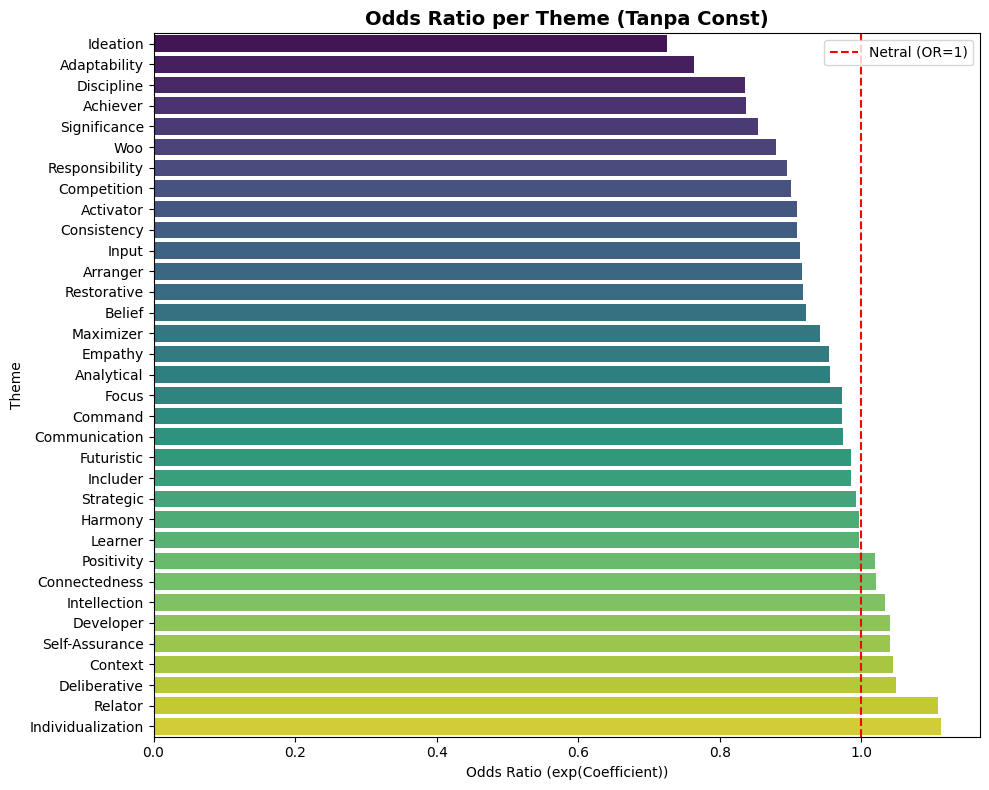

C:\Users\fajar\AppData\Local\Temp\ipykernel_39420\1851777018.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='p_value', y='Theme', data=viz_df, palette='coolwarm_r')


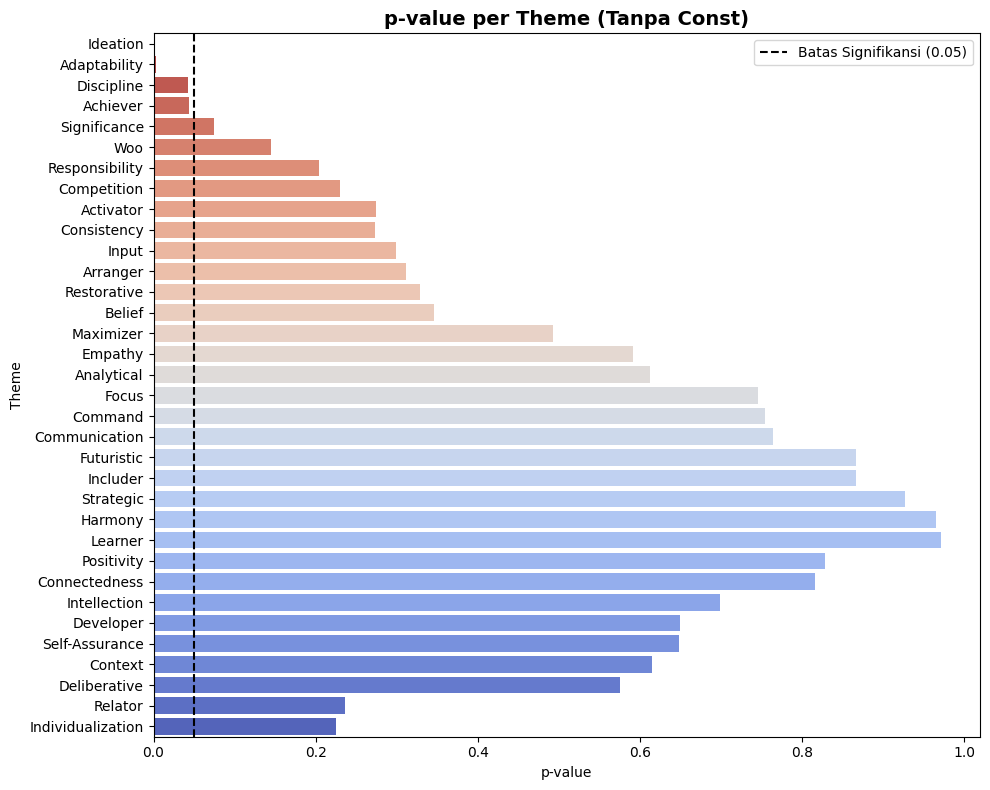

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================
# 🔹 8. Visualisasi Odds Ratio & p-value
# ================================================
# Hapus const agar fokus pada theme
viz_df = summary_df[summary_df['Theme'] != 'const']

# Atur urutan berdasarkan Odds Ratio
viz_df = viz_df.sort_values('Odds_Ratio', ascending=True)

# -----------------------------------------------
# 🔸 Plot 1: Odds Ratio (dengan batas 1 = netral)
# -----------------------------------------------
plt.figure(figsize=(10, 8))
sns.barplot(x='Odds_Ratio', y='Theme', data=viz_df, palette='viridis')

plt.axvline(1, color='red', linestyle='--', linewidth=1.5, label='Netral (OR=1)')
plt.title('Odds Ratio per Theme (Tanpa Const)', fontsize=14, weight='bold')
plt.xlabel('Odds Ratio (exp(Coefficient))')
plt.ylabel('Theme')
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 🔸 Plot 2: p-value (dengan batas 0.05 = signifikan)
# -----------------------------------------------
plt.figure(figsize=(10, 8))
sns.barplot(x='p_value', y='Theme', data=viz_df, palette='coolwarm_r')

plt.axvline(0.05, color='black', linestyle='--', linewidth=1.5, label='Batas Signifikansi (0.05)')
plt.title('p-value per Theme (Tanpa Const)', fontsize=14, weight='bold')
plt.xlabel('p-value')
plt.ylabel('Theme')
plt.legend()
plt.tight_layout()
plt.show()


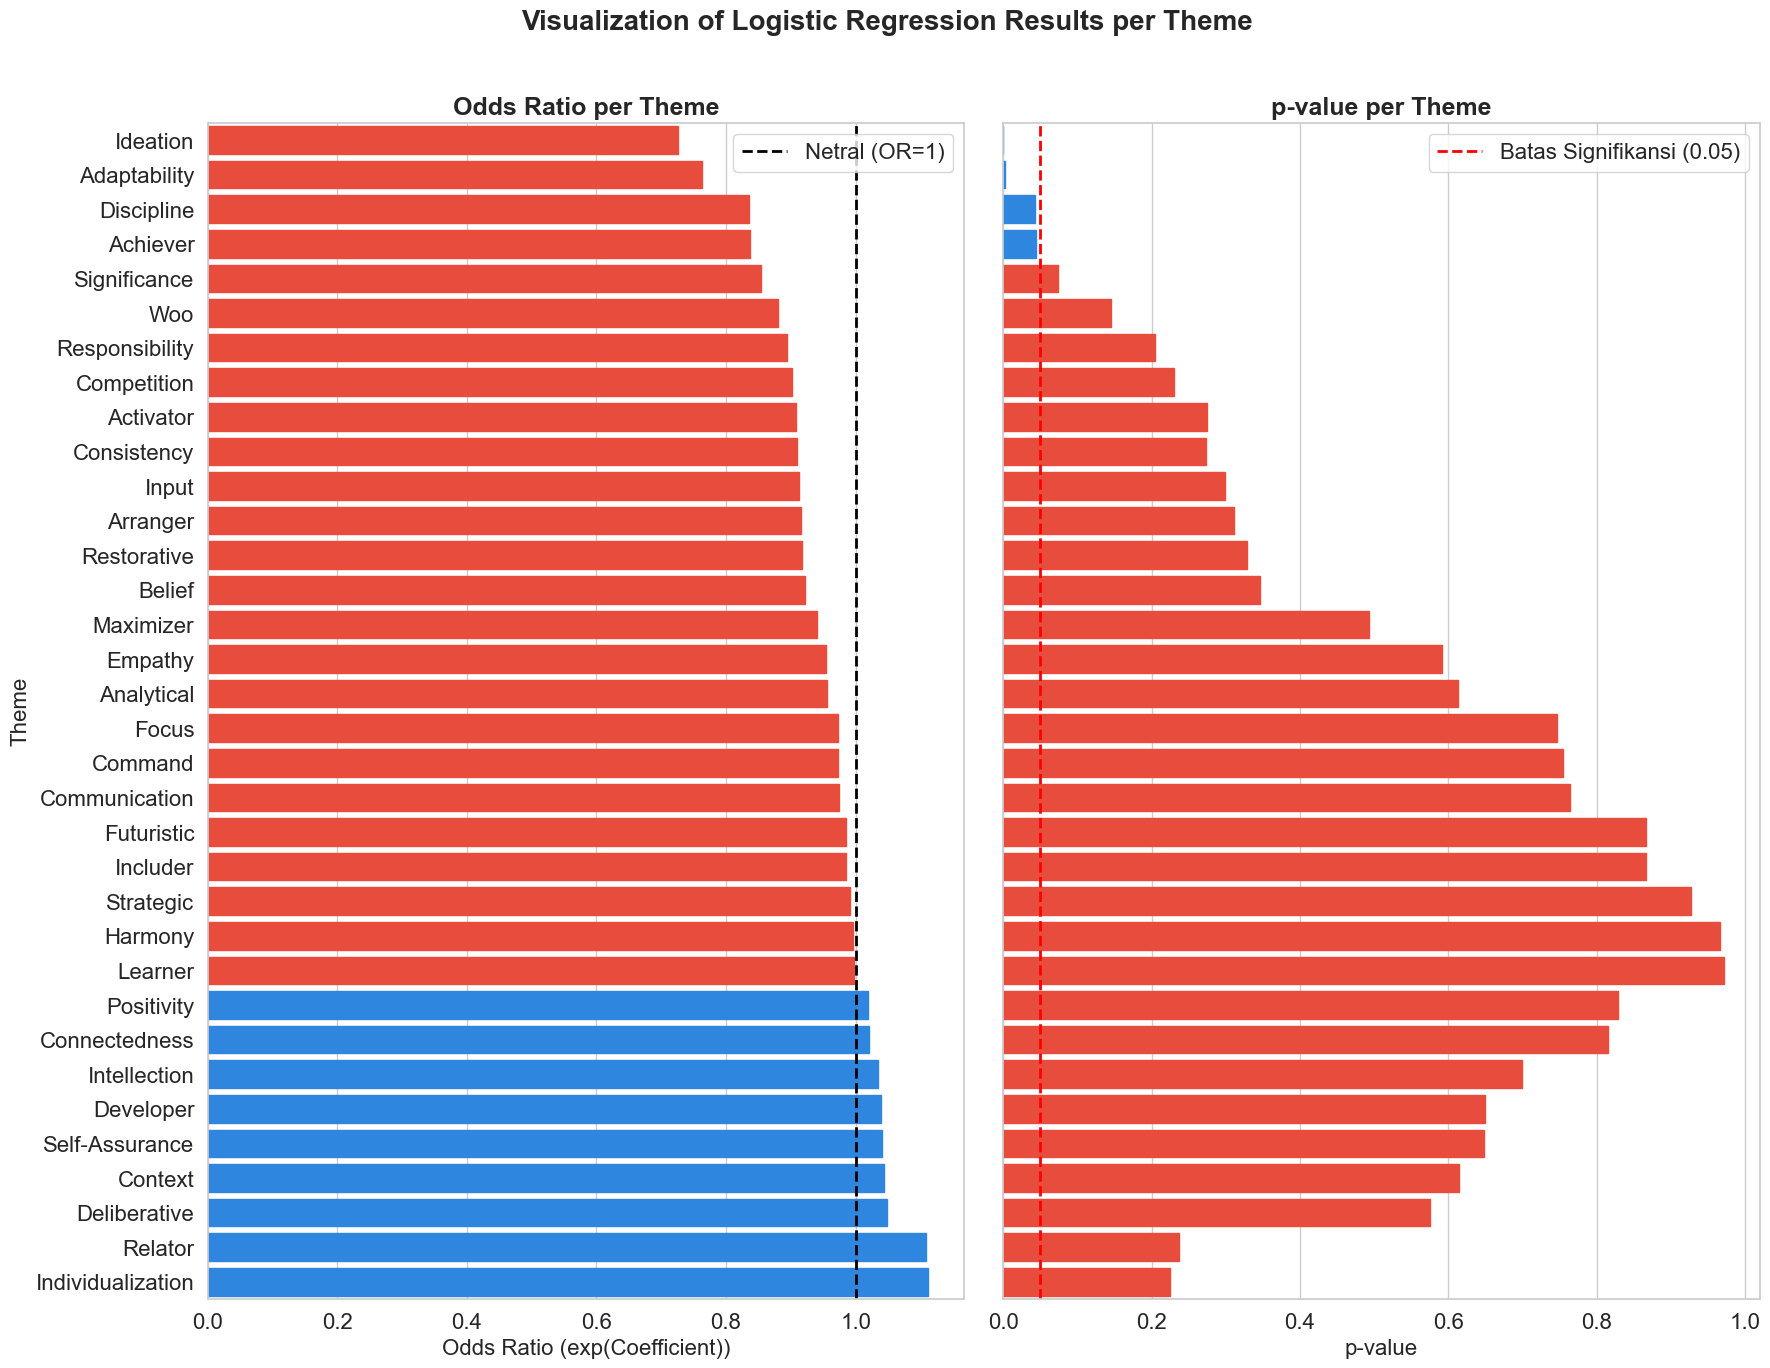

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================
# 🔹 Visualisasi Odds Ratio & p-value (warna berbeda)
# ================================================
viz_df = summary_df[summary_df['Theme'] != 'const'].copy()
viz_df = viz_df.sort_values('Odds_Ratio', ascending=True)

# Warna Odds Ratio: biru (baik, >1) dan merah (buruk, <1)
or_colors = ['#2E86DE' if x > 1 else '#E74C3C' for x in viz_df['Odds_Ratio']]

# Warna p-value: biru (signifikan), merah (tidak signifikan)
pval_colors = ['#2E86DE' if p < 0.05 else '#E74C3C' for p in viz_df['p_value']]

# Buat figure dengan 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 14), sharey=True)

# -----------------------------------------------
# 🔸 Subplot 1: Odds Ratio
# -----------------------------------------------
bars1 = sns.barplot(x='Odds_Ratio', y='Theme', data=viz_df, ax=axes[0])
for bar, color in zip(bars1.patches, or_colors):
    bar.set_color(color)

axes[0].axvline(1, color='black', linestyle='--', linewidth=2, label='Netral (OR=1)')
axes[0].set_title('Odds Ratio per Theme', fontsize=18, weight='bold')
axes[0].set_xlabel('Odds Ratio (exp(Coefficient))', fontsize=16)
axes[0].set_ylabel('Theme', fontsize=16)
axes[0].tick_params(axis='both', labelsize=16)
axes[0].legend(fontsize=16)

# -----------------------------------------------
# 🔸 Subplot 2: p-value (warna berdasarkan signifikansi)
# -----------------------------------------------
bars2 = sns.barplot(x='p_value', y='Theme', data=viz_df, ax=axes[1])
for bar, color in zip(bars2.patches, pval_colors):
    bar.set_color(color)

axes[1].axvline(0.05, color='red', linestyle='--', linewidth=2, label='Batas Signifikansi (0.05)')
axes[1].set_title('p-value per Theme', fontsize=18, weight='bold')
axes[1].set_xlabel('p-value', fontsize=16)
axes[1].set_ylabel('')
axes[1].tick_params(axis='both', labelsize=16)
axes[1].legend(fontsize=16)

# Tata letak
plt.suptitle('Visualization of Logistic Regression Results per Theme', fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


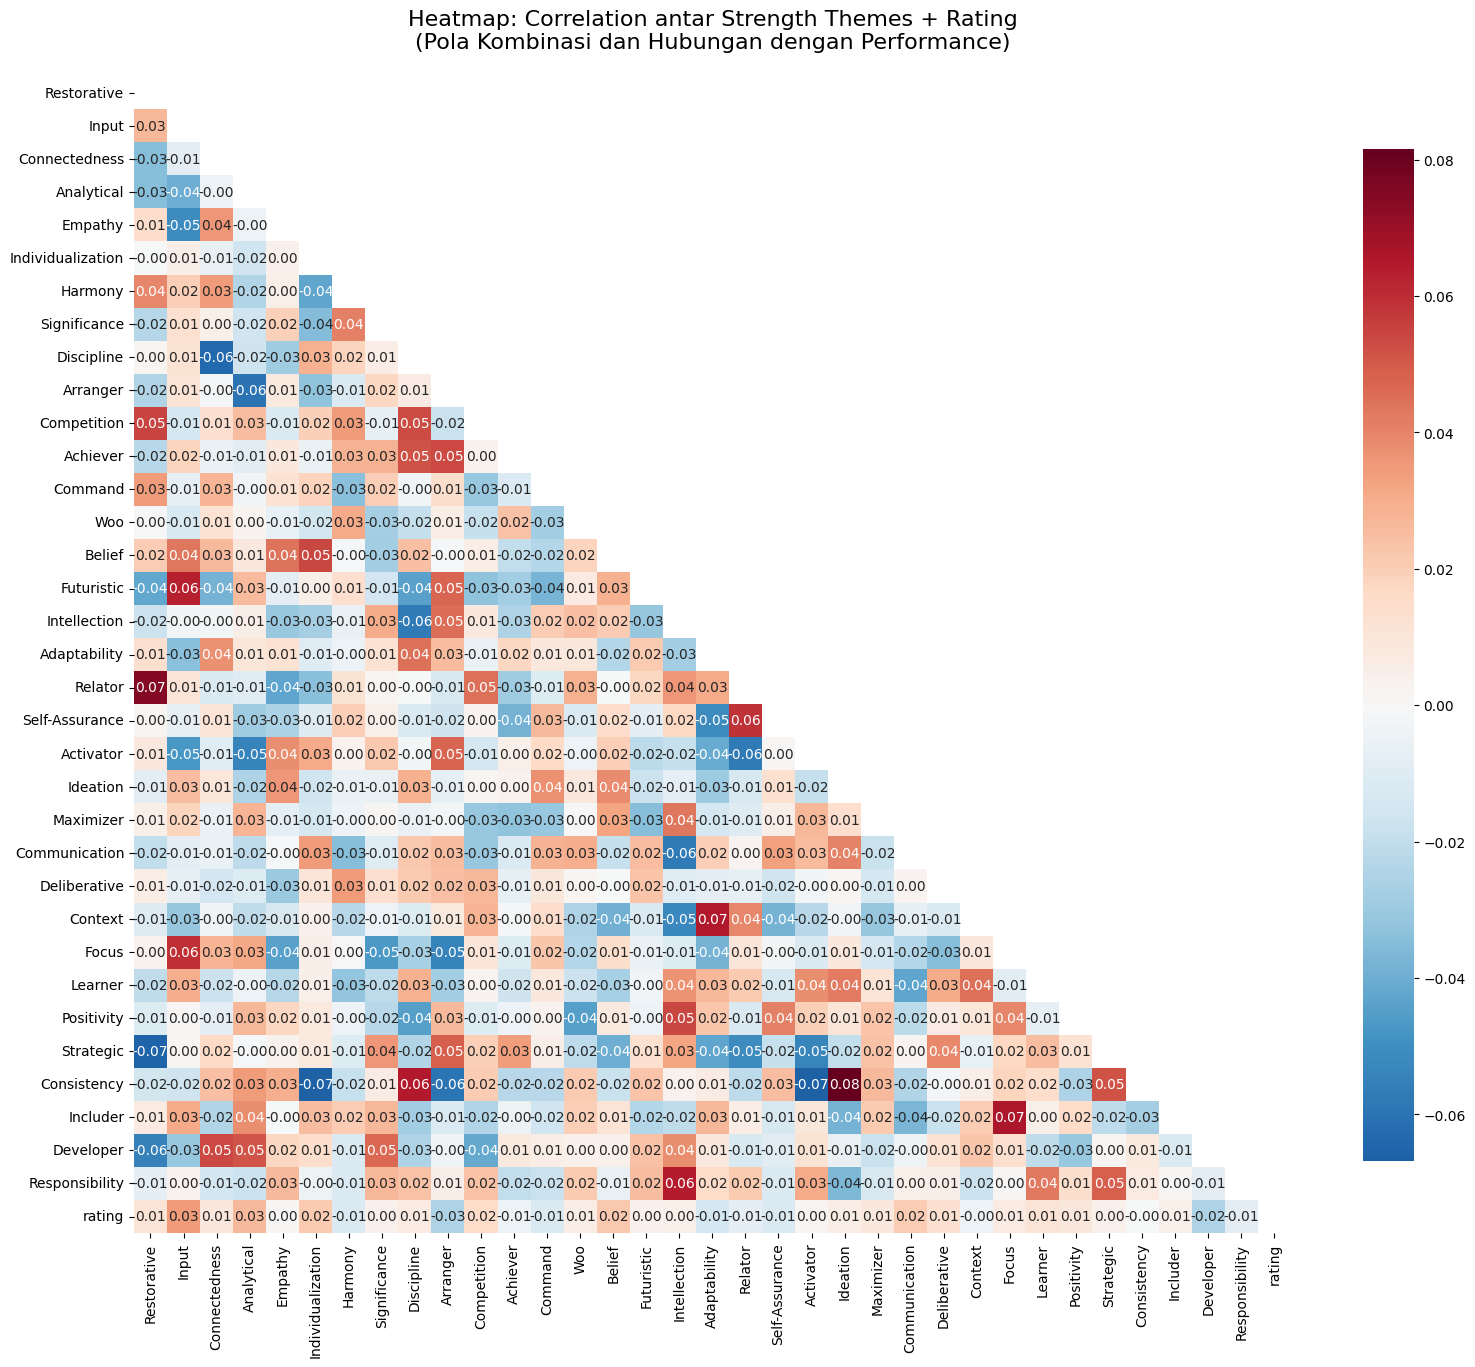

In [143]:
# ================================================
# 🔥 HEATMAP ANALYSIS - Strength Themes vs Rating
# ================================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Asumsi: merged_df sudah ada dan berisi themes + kolom rating 'is_high' atau 'performance_score'
# Tambahkan rating ke binary_matrix
heatmap_df = binary_matrix[themes].copy()
heatmap_df['rating'] = merged_df['is_high']  # Bisa diganti dengan 'performance_score' jika ada

# Hitung korelasi themes + rating
corr_matrix = heatmap_df.corr()

# Mask untuk segitiga atas
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, mask=mask, cmap='RdBu_r', center=0,
            square=True, annot=True, fmt=".2f",
            cbar_kws={"shrink": .8})
plt.title('Heatmap: Correlation antar Strength Themes + Rating\n(Pola Kombinasi dan Hubungan dengan Performance)',
          fontsize=16, pad=20)
plt.tight_layout()
plt.show()
